In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


**Análise do dataset Iris¶**
Este notebook explora o dataset Iris, um conjunto de dados clássico em aprendizado de máquina e estatística. Ele contém 150 amostras de três espécies de flores do gênero Iris:

Iris setosa
Iris versicolor
Iris virginica
Para cada amo

**foram medidas quatro características:**ticas:

Comprimento da sépala (sepal length) em cm
Largura da sépala (sepal width) em cm
Comprimento da pétala (petal length) em cm
Largura da pétala (petal width) em cm
Este dataset é amplamente utilizado para tarefas de classificação, onde o objetivo é prever a espécie de uma flor com base em suas característica**Importando bibliotecas e dados...**cas e dados...
Para essa tarefa, usaremos bibliotecas como o pandas, numpy, scikit-learn, etc. Portanto, faremos a importação dessas todas logo de início. Faço isso por preferência pessoal, visto que poderia importá-las conforme necessário nas células a seguir.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.optimizers import Adam
import os
import kagglehub

In [28]:
# Importação do dataset usando o KaggleHub.
arshid_iris_flower_dataset_path = kagglehub.dataset_download('arshid/iris-flower-dataset')
iris_csv_path = os.path.join(arshid_iris_flower_dataset_path, "IRIS.csv")

# Lendo-o em forma de dataframe
df = pd.read_csv(iris_csv_path)

df.head() # Primeiras 5 instâncias

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Visualização dos dados**

Teremos a exibição, logo abaixo, de informações sobre os dados, tais quais a distribuição dos valores de seus atributos.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


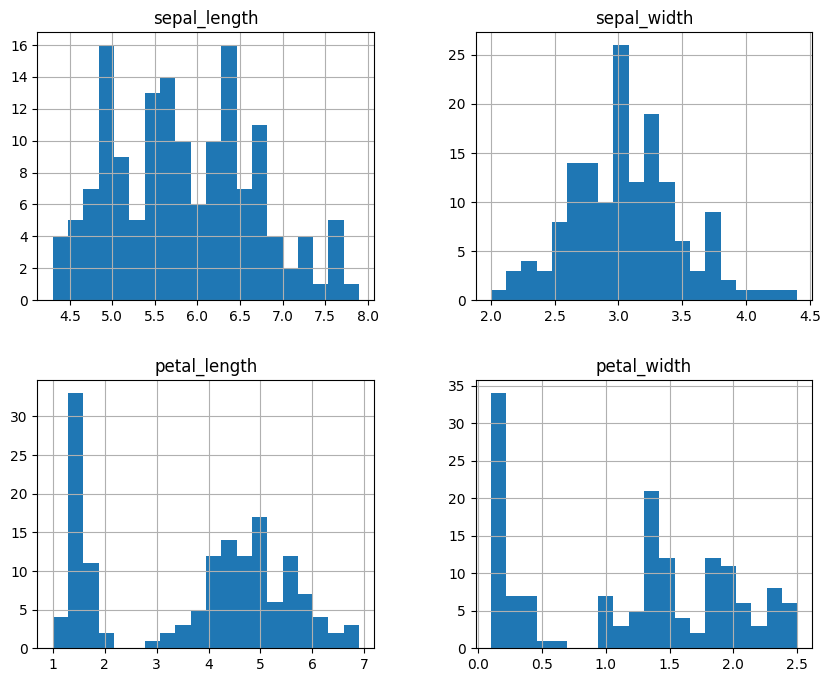

In [30]:
df.hist(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], bins=20, figsize=(10, 8))

plt.show()

**Pré-processamento dos dados**

Agora começaremos o processo de limpeza e entendimento dos dados. Para essa tarefa, pretendo alcançar os seguintes objetivos:

Manipular o dataset conforme meu objetivo final, que será prever a especificação de uma flor com base em seus atributos.

Codificação de variáveis categóricas, como a feature "species" usando o Label Encoder.

Normalização dos dados numéricos utilizando o MinMax. Para isso, antes, iremos dividir os dados entre teste e treinamento, algo que será útil posteriormente no treino do modelo.

In [31]:
# Codificação de variáveis categóricas (coluna "species")

le = sk.preprocessing.LabelEncoder()
df["species"] = le.fit_transform(df["species"])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
# Divisão dos dados entre treino e teste

X = df.values[:,:-1] # Todas as linhas e colunas (exceto a última)
Y = df.values[:,-1] # Todas as linhas da última coluna

train_set_X, test_set_X, train_set_Y, test_set_Y = train_test_split(X, Y, test_size=0.30, random_state=7) # 70% dos dados para treinamento


In [33]:
# Escalonamento dos dados numéricos

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(train_set_X)

X_test_scaled = scaler.transform(test_set_X) # Usa os parâmetros ajustados do conjunto de treino para transformar o conjunto de teste, isso evita viés


In [34]:
# Exibição dos dados após normalização

n = train_set_X.shape[1]  # número de atributos
m = train_set_X.shape[0]  # número de exemplos de treinamento

print("Número de atributos: n = " + str(n))
print("Número de exemplos de treinamento: m = " + str(m))
print("Formato do conjunto de treino X: " + str(train_set_X.shape))
print("Formato do conjunto de treino Y: " + str(train_set_Y.shape))
print("Formato do conjunto de teste X: " + str(test_set_X.shape))
print("Formato do conjunto de teste Y: " + str(test_set_Y.shape))

Número de atributos: n = 4
Número de exemplos de treinamento: m = 105
Formato do conjunto de treino X: (105, 4)
Formato do conjunto de treino Y: (105,)
Formato do conjunto de teste X: (45, 4)
Formato do conjunto de teste Y: (45,)


**Configuração do modelo¶**

Definição da estrutura da rede neural, sendo composta por:
Entrada com quantidade de neurônios iguais à quantidade de atributos.
Primeira camada oculta densa, com 64 unidades, usando a função de ativação Leaky ReLU. Essa camada será usada para configurar um dropout (estratégia que usarei para evitar overfitting, visto que o número de instâncias é relativamente pequena).
Segunda camada oculta densa, já afetada pelo dropout da primeira. Ela é composta por 32 unidades, com a função de ativação Leaky ReLU. Essa camada também será usada para a criação de outro dropout.
A terceira camada oculta densa conta com 16 unidades, também utilizando a função de ativação Leaky ReLU.
Por fim, a camada de saída contém 3 neurônios, cada um representando uma das classes distintas do dataset. Essa camada usa a função de ativação softmax, que é adequada para problemas de classificação multiclasse, pois retorna uma probabilidade para cada classe, totalizando 1.

In [35]:
inputs = keras.Input(shape=(train_set_X.shape[1],))  # Mesma quantidade dos atributos
layer1 = keras.layers.Dense(units=64, activation='leaky_relu')(inputs)
dropout1 = keras.layers.Dropout(0.2)(layer1)
layer2 = keras.layers.Dense(units=32, activation='leaky_relu')(dropout1)
dropout2 = keras.layers.Dropout(0.2)(layer2)
layer3 = keras.layers.Dense(units=16, activation='leaky_relu')(dropout2)
outputs = keras.layers.Dense(units=3, activation="softmax")(layer3)  # Quantidade de classes diferentes

model = keras.models.Model(inputs=inputs, outputs=outputs)

In [36]:
# Informações da rede

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,979 (11.64 KB)

 Trainable params: 2,979 (11.64 KB)

 Non-trainable params: 0 (0.00 B)

**Execução do modelo preditivo**

Agora vamos, enfim, utilizar os dados já organizados para o treinamento do nosso modelo. Nesse sentido, usaremos a rede neural artifical configurada logo acima. Usaremos algumas métricas diferentes, como a sparse categorical crossentropy, além da accuracy. O otimizador utilizado será o Adam, com uma taxa de aprendizado de 0,001.

In [37]:
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', keras.metrics.SparseCategoricalAccuracy()])

In [38]:
history = model.fit(train_set_X, train_set_Y, batch_size=32, epochs=50)

print(history.history)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3125 - loss: 1.2402 - sparse_categorical_accuracy: 0.3125
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3573 - loss: 1.1480 - sparse_categorical_accuracy: 0.3573 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4249 - loss: 1.0850 - sparse_categorical_accuracy: 0.4249 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4974 - loss: 0.9636 - sparse_categorical_accuracy: 0.4974 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5206 - loss: 0.9600 - sparse_categorical_accuracy: 0.5206 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4935 - loss: 0.9217 - sparse_categorical_accuracy: 0.4935 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5650 - loss: 0.8455 - sparse_categorical_accuracy: 0.5650 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6361 - loss: 0.8127 - sparse_categorical_accuracy: 0.6361 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━

**Avaliação do modelo**

Para o avaliarmos, entenderemos seu desempenho de predição no conjunto de treino, antes de passarmos para a predição propriamente dita.

In [39]:
loss, acc, sparse_acc= model.evaluate(test_set_X, test_set_Y)

print("Loss: %.2f" % loss, "\nAccuracy: %.2f" % acc, "\nSparse Accuracy: %.2f" % sparse_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9243 - loss: 0.3058 - sparse_categorical_accuracy: 0.9243  
Loss: 0.29 
Accuracy: 0.93 
Sparse Accuracy: 0.93


**Predição**

Se tratando da predição propriamente dita, exibiremos as classes com maior probabilidade indicadas pela função softmax e contabilizaremos os acertos e erros do modelo.

In [40]:
predictions = model.predict(test_set_X)

predicted_classes = [np.argmax(pred) for pred in predictions]  # Pega a classe com a maior probabilidade
correct_labels = [int(x) for x in test_set_Y]
num_correct = sum([1 for i in range(len(correct_labels)) if predicted_classes[i] == correct_labels[i]])

print("Número de acertos:", num_correct)
print("Total de exemplos:", len(correct_labels))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Número de acertos: 42
Total de exemplos: 45
